In [86]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import seaborn as sns
import pandas as pd
import random
import json

# Read in Daily Article Totals by Year Across the Study Period

In [87]:
df_2015 = pd.read_csv(f'./yearly/overview_2015.csv')
df_2016 = pd.read_csv(f'./yearly/overview_2016.csv')
df_2017 = pd.read_csv(f'./yearly/overview_2017.csv')
df_2018 = pd.read_csv(f'./yearly/overview_2018.csv')

df_2015['Date'] = df_2015['Date'].astype(str)
df_2016['Date'] = df_2016['Date'].astype(str)
df_2017['Date'] = df_2017['Date'].astype(str)
df_2018['Date'] = df_2018['Date'].astype(str)

# Plot Daily Article Totals for Each Year

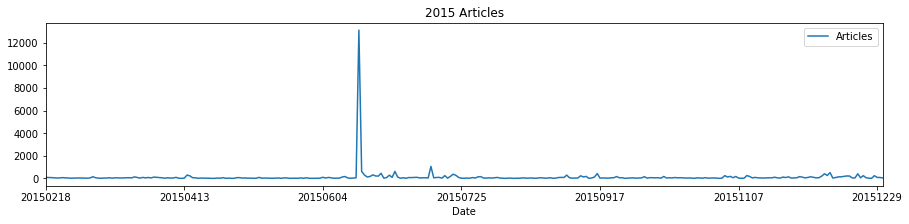

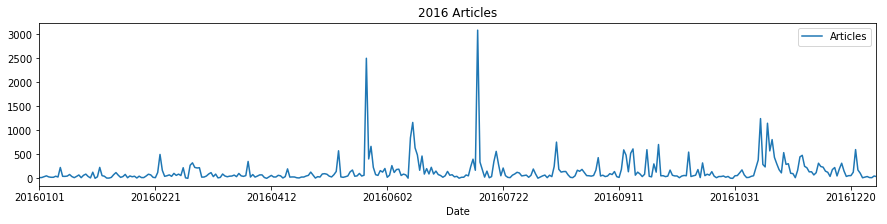

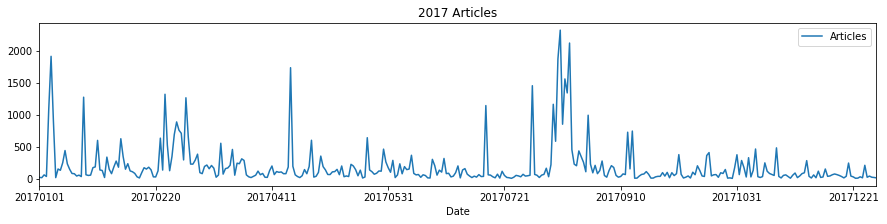

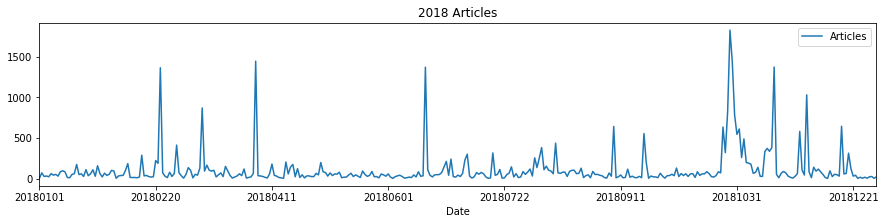

In [88]:
df_2015.plot(x='Date', y='Articles', title='2015 Articles', figsize=(15,3))
df_2016.plot(x='Date', y='Articles', title='2016 Articles', figsize=(15,3))
df_2017.plot(x='Date', y='Articles', title='2017 Articles', figsize=(15,3))
df_2018.plot(x='Date', y='Articles', title='2018 Articles', figsize=(15,3))

# Identifying Emanuel African Methodist Episcopal Church Shooting as Outlier
- There were a total of 13111 (i.e. sum(numarticles)) articles for 20150618. The next 3 highest values for a single day were 3090, 2504, and 2323 articles.

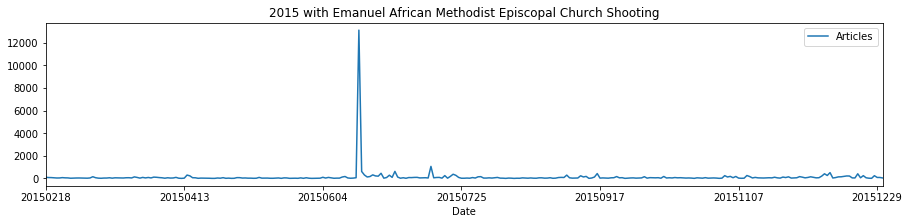

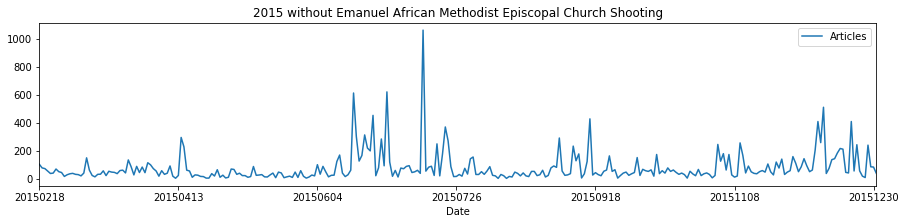

In [89]:
df_2015.plot(x='Date', y='Articles', title='2015 with Emanuel African Methodist Episcopal Church Shooting', figsize=(15, 3))
df_2015[df_2015.Date != '20150618'].plot(x='Date', y='Articles', title='2015 without Emanuel African Methodist Episcopal Church Shooting', figsize=(15, 3))

# Daily Articles Across the Study Period

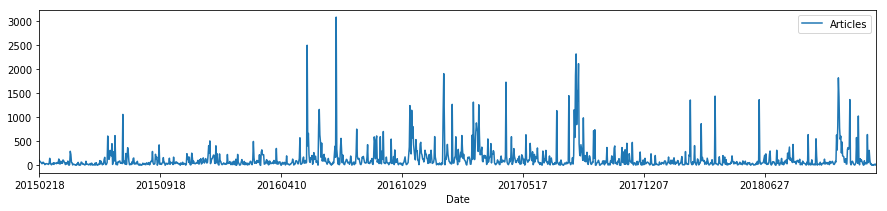

In [90]:
full_df = pd.concat([df_2015, df_2016, df_2017, df_2018])
full_df[full_df.Date != '20150618'].plot(x='Date', y='Articles', figsize=(15, 3))

# Total Articles by Year
- If we remove the shooting at the Emanuel African Methodist Episcoal Church in 2015 as an outlier, it looks as though 2018 was returning to the media landscape as it appeared in 2015. 

Year
2015    37035
2016    53500
2017    69604
2018    40584
Name: Articles, dtype: int64


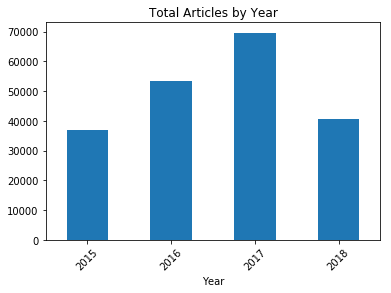

In [91]:
gb = full_df.groupby('Year')['Articles'].agg('sum')
print(gb)
gb.plot(x='Year', kind='bar', rot=45, title='Total Articles by Year')

# Load Event Windows & Build Data Frame

In [92]:
events = json.load(open('gdelt_hate.json', 'rb'))

df = pd.DataFrame.from_dict(events).transpose()

keys = df['keywords'].apply(pd.Series)
keys = keys.rename(columns = lambda x : 'k_' + str(x))
df  = pd.concat([df[:], keys[:]], axis=1)

df.reset_index(inplace=True)
df.rename(index=str, columns={"index": "start_end"}, inplace=True)

df['start'] = df['start_end'].apply(lambda x: x[:8])
df['end']   = df['start_end'].apply(lambda x: x[-8:])
df['year']  = df['start_end'].apply(lambda x: x[:4])

df.fillna(0, inplace=True)
df.sort_values('start_end', inplace=True)

df

,start_end,articles,ascent,descent,keywords,length,movement,tone,k_0,k_1,...,k_7,k_8,k_9,k_10,k_11,k_12,k_13,start,end,year
0,20150413_20150418,672,1,4,"[COLLEGE, SHOOTING, STANCIL, POSSIBLE, COMMUNITY]",6,33,-5.0,COLLEGE,SHOOTING,...,0,0,0,0,0,0,0,20150413,20150418,2015
1,20150503_20150506,176,1,2,"[TEXAS, SPEECH, MUSLIM, GELLER, EVENT, GARLAND]",4,33,-5.0,TEXAS,SPEECH,...,0,0,0,0,0,0,0,20150503,20150506,2015
2,20150617_20150627,15584,1,9,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]",11,58,-6.0,CHURCH,CHARLESTON,...,0,0,0,0,0,0,0,20150617,20150627,2015
3,20150630_20150703,849,1,2,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]",4,27,-6.0,CHURCH,BLACK,...,0,0,0,0,0,0,0,20150630,20150703,2015
4,20150713_20150718,1349,1,4,"[FLAG, CONFEDERATE, WHITE, MUSLIM, CHARLESTON,...",6,36,-5.0,FLAG,CONFEDERATE,...,POSTED,CHURCH,FLORIDA,OREILLY,SYMBOL,0,0,20150713,20150718,2015
5,20150730_20150802,360,2,1,"[CHURCH, ROOF, FEDERAL, CHARLESTON, GUILTY, SO...",4,19,-7.0,CHURCH,ROOF,...,0,0,0,0,0,0,0,20150730,20150802,2015
6,20150902_20150904,427,1,1,"[BLACK, LIVES, MATTER, WHITE, MAN, INSULTS, RA...",3,15,-6.0,BLACK,LIVES,...,CITY,THATS,CHURCH,ALABAMA,COUNTY,MEN,0,20150902,20150904,2015
7,20150909_20150913,579,1,3,"[SIKH, MUKKER, COUNTRY, CAR, SINGH, LADEN]",5,25,-7.0,SIKH,MUKKER,...,0,0,0,0,0,0,0,20150909,20150913,2015
8,20150915_20150917,577,1,1,"[SIKH, MAN, MUKKER, SINGH, TEEN, ELDERLY, GARCIA]",3,23,-8.0,SIKH,MAN,...,0,0,0,0,0,0,0,20150915,20150917,2015
9,20151002_20151004,218,1,1,"[OREGON, CHRISTIANS, SHOOTING, OBAMA, MERCER, ...",3,12,-7.0,OREGON,CHRISTIANS,...,YOURE,VICTIMS,LAW,RELIGION,WOMEN,UMPQUA,SHOT,20151002,20151004,2015


# Plot of Top 10 Windows Based on Total Articles

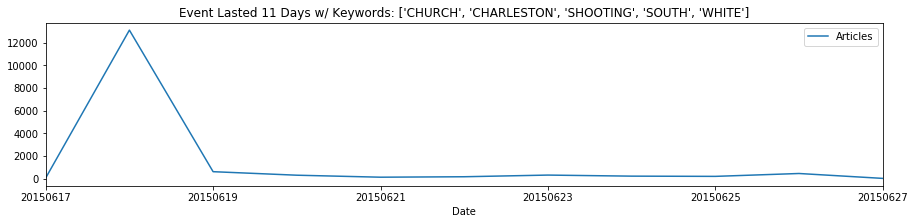

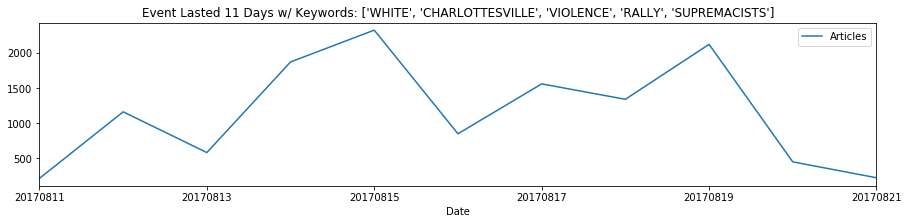

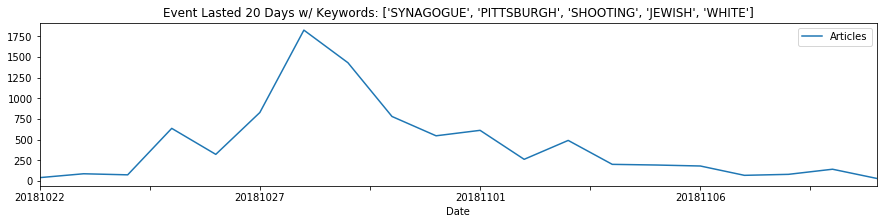

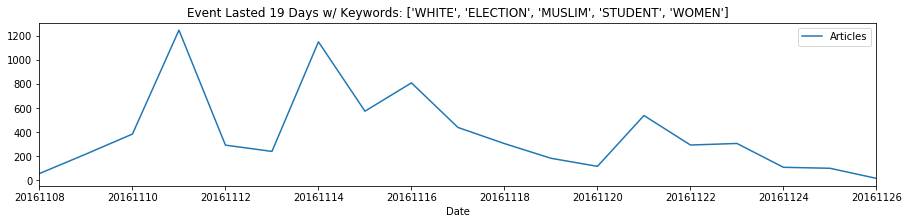

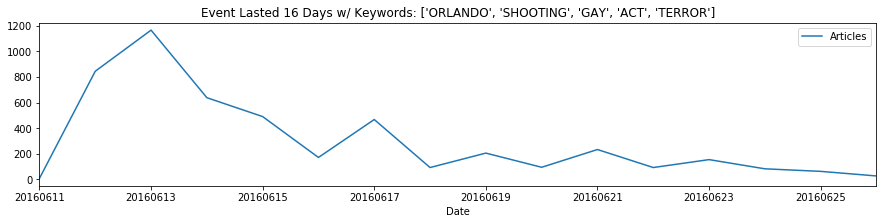

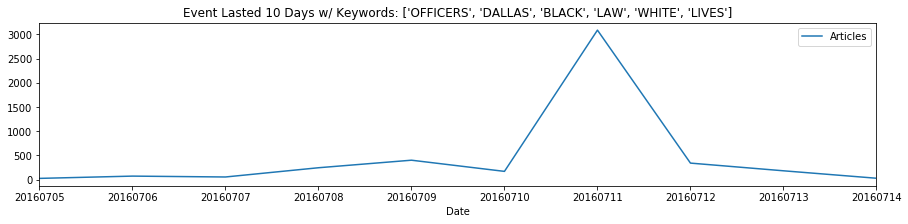

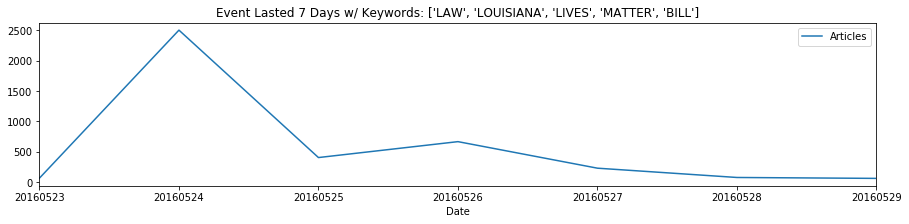

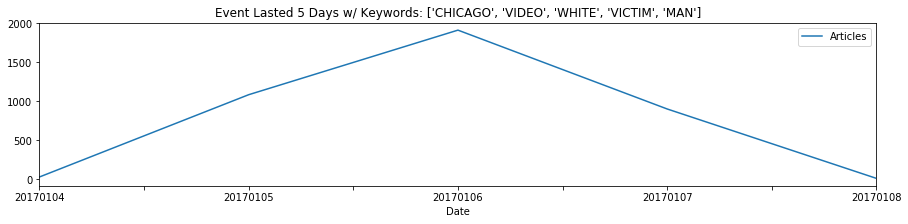

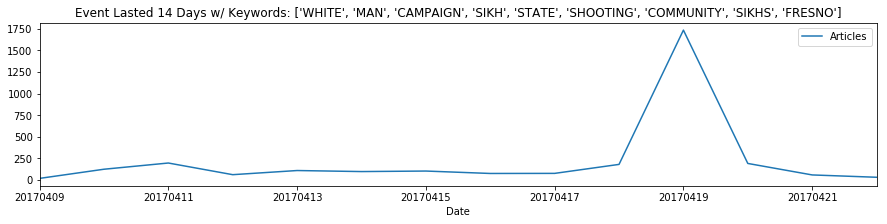

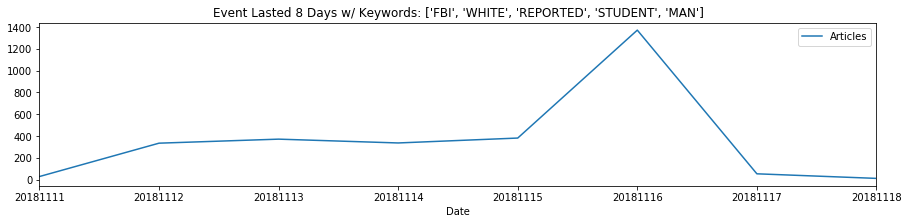

In [93]:
top_windows_by_articles = df.sort_values('articles', ascending=False)[['start_end', 'keywords', 'length']][:10]
for row in top_windows_by_articles.iterrows():
    the_data = row[1]
    start, end = the_data[0].split('_')
    full_df[full_df.Date.between(start, end)].plot(
        title=f'Event Lasted {the_data[2]} Days w/ Keywords: {the_data[1]}',
        x='Date', 
        y='Articles', 
        figsize=(15, 3)
    )

# Count of Windows Across Study Period
- As expected, the number of windows across the study period matches the trend in the total number of articles. However, there were more distinct windows in 2016 than in 2017, even though there were more total articles. This makes sense when compared against the slighter shorted window length in 2016 observed below.

      count
2015     13
2016     24
2017     22
2018     16


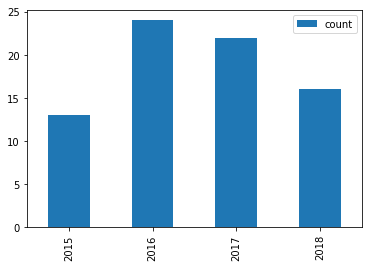

In [94]:
year_counts = df.year.value_counts().to_frame().sort_index()
year_counts.rename(index=str, columns={"year": "count"}, inplace=True)
print(year_counts)
year_counts.plot(kind='bar')

# Filter Outliers for Yearly Metrics
- Emanuel African Methodist Episcopal Church Shooting

In [95]:
metric_df = df[df.start_end != '20150617_20150627']

# General Window Metrics: Articles & Tone by Year
- Median and minimum articles steadily increase over the study period. If there is a new baseline for "hate" in the media, the question becomes whether we are seeing more hate crimes and violent events over time, or if the media is covering intersectional "hate" topics more frequently? We would expect the latter to be true based on the fact that the total number of articles and windows (events) is decreasing over time.
- Tone appears to be stable across time.

In [96]:
gb = metric_df.groupby('year').agg(['mean', 'median', 'min', 'max'])[['articles', 'tone']]
gb

articles                          tone                 
             mean  median  min    max      mean median  min  max
year                                                            
2015   666.083333   578.0  176   1481 -6.083333   -6.0 -8.0 -5.0
2016  1561.833333   737.5  270   7374 -5.416667   -5.5 -7.0 -4.0
2017  1981.636364  1193.0  238  12701 -5.954545   -6.0 -8.0 -5.0
2018  1693.312500  1415.0  301   8798 -5.875000   -6.0 -7.0 -4.0

# General Window Metrics: Ascent, Descent, Length, Movement by Year
- Descent and Length are roughly 3 times higher in 2018 than in 2015.
- Ascent and Movement are roughly 2 times higher in 2018 than in 2015.
- Each of these observations helps validate the statement above that the media is talking more about topics surrounding the term "hate". The next question that will be explored is whether or not we can identify a skew or bias in the keywords taking up most of this narrative.

In [97]:
gb = metric_df.groupby('year').agg(['mean', 'median', 'min', 'max'])[['ascent', 'descent', 'length', 'movement']]
gb

ascent                  descent                   length             \
          mean median min max      mean median min max      mean median min   
year                                                                          
2015  1.333333      1   1   4  2.416667    2.0   1   5  4.750000    4.5   3   
2016  1.916667      2   1   6  4.000000    2.5   1  15  6.875000    6.0   3   
2017  2.863636      2   1  10  3.454545    2.0   1  12  7.318182    6.5   3   
2018  2.875000      2   1  10  3.500000    2.0   1  13  7.312500    6.0   3   

           movement                  
     max       mean median min  max  
year                                 
2015   7  32.166667   30.0  12   79  
2016  19  45.916667   39.5  10  119  
2017  15  57.272727   34.0   9  191  
2018  20  58.437500   32.0   2  167

# Top Keywords in Windows
- The appearance of Charlottesville is illustrative of the "White Noise" problem. Other citiess (e.g. Charleston, Charlotte, Fresno, ect.) are found in the window keywords, but only Charlottesville, an event where a white man killed a white woman at a white nationalist rally, popped up enough to qualify as a frequently occuring term.
- There is also good reason to believe that "MAN" is often a synonym for "WHITE" in the majority of cases. This will be explored more in the report.
- Our report describes an observable westward migration for the "hate" data across our study period. Seeing "TEXAS" as a keyword (in addition to the supporting aggregated data from SPLC) helps confirm this trend. The next question would be whether or not more violent actions are happening in the west, or if this model is simply seeing more westward coverage of events happenign in the east.

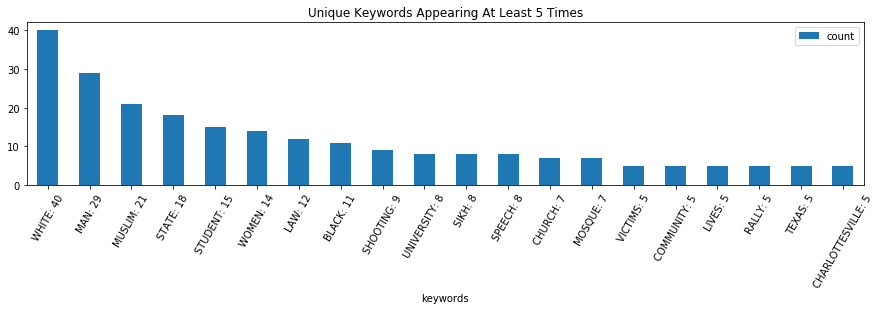

In [98]:
top = 5

all_keywords = list(chain(*df.keywords))

tk_df = pd.DataFrame([['{}: {}'.format(a, b), b] for a, b in Counter(all_keywords).items()], columns=['keywords', 'count'])
tk_df = tk_df[tk_df['count'] >= top]

tk_df.sort_values('count', inplace=True, ascending=False)
tk_df.plot(x='keywords', y='count', kind='bar', title=f'Unique Keywords Appearing At Least {top} Times', figsize=(15, 3), rot=60)

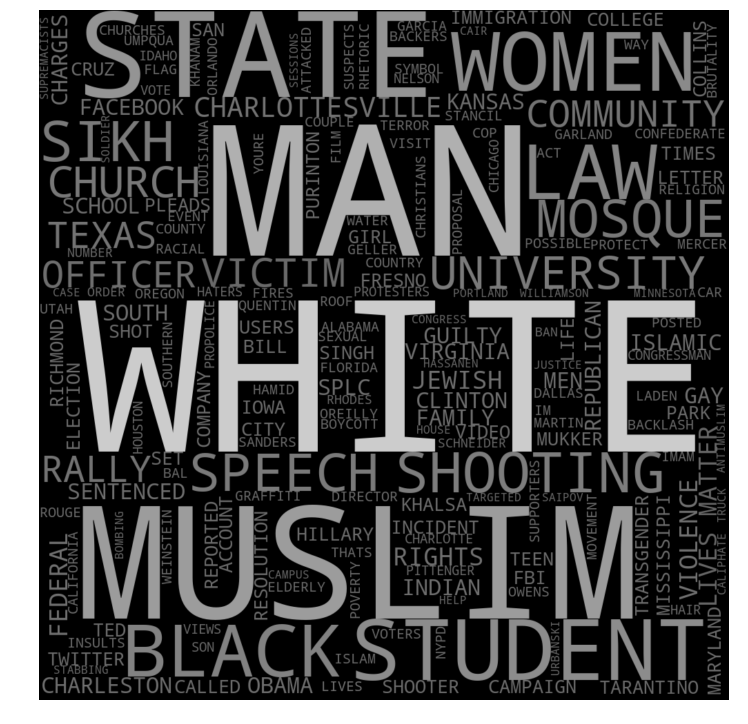

In [99]:
freq_dict = dict(Counter(all_keywords))

def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    try:
        return f"hsl(0, 0%, {freq_dict[word] + max(freq_dict.values())}%)"
    except:
        return f"hsl(0, 0%, {max(freq_dict.values())}%)"


wordcloud = WordCloud(
    width = 1000, 
    height = 1000, 
    min_font_size = 10,
    background_color='black'
)

wordcloud.generate(' '.join(all_keywords))

plt.figure(figsize = (10, 10), facecolor=None)
plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Keyword Metrics
- Ascent: Number of days it took to get from the baseline number of articles to the peak for the window.
- Descent: Numbers of days it took get from the peak of the window back to the baseline before the window began. 
- Movement: The geographic center (weighted by the total number of articles) for each day was found, and then these points were turned into a single polyline feature. Movement is the length of the polyline. 
- Length: Total number of days the window lasted. 

In [100]:
# Yearly Descriptive Metrics

yearly_agg = metric_df.agg(['mean', 'median', 'min', 'max'])[['articles', 'ascent', 'descent', 'movement', 'length']]
yearly_agg

,articles,ascent,descent,movement,length
mean,1569.810811,2.310811,3.472973,49.77027,6.756757
median,836.500000,2.000000,2.000000,33.00000,6.000000
min,176.000000,1.000000,1.000000,2.00000,3.000000
max,12701.000000,10.000000,15.000000,191.00000,20.000000


In [101]:
# Maximum Values

data  = []
for keyword in tk_df.keywords:
    keyword = keyword.split(':')[0]
    rows = df[df.keywords.apply(lambda x: keyword in x)]
    data.append([keyword, rows.articles.max(), rows.ascent.max(), rows.descent.max(), rows.movement.max(), rows.length.max(), len(rows)])
d = pd.DataFrame(data, columns=['keyword', 'articles', 'ascent', 'descent', 'movement', 'length', 'count']) 
d.sort_values('count', inplace=True, ascending=False)
d

,keyword,articles,ascent,descent,movement,length,count
0,WHITE,15584,10,15,191,20,40
1,MAN,3948,10,11,168,16,29
2,MUSLIM,7374,7,15,191,19,21
3,STATE,3054,10,11,168,14,18
4,STUDENT,7374,7,15,191,19,15
5,WOMEN,7374,3,15,119,19,14
6,LAW,4608,6,9,118,11,12
7,BLACK,4608,6,11,167,14,11
8,SHOOTING,15584,10,13,168,20,9
11,SPEECH,2877,10,7,191,16,8


In [102]:
# Median Values

data  = []
for keyword in tk_df.keywords:
    keyword = keyword.split(':')[0]
    rows = df[df.keywords.apply(lambda x: keyword in x)]
    data.append([keyword, rows.articles.median(), rows.ascent.median(), rows.descent.median(), rows.movement.median(), rows.length.median(), len(rows)])
med_d = pd.DataFrame(data, columns=['keyword', 'articles', 'ascent', 'descent', 'movement', 'length', 'count']) 
med_d.sort_values('count', inplace=True, ascending=False)
med_d

,keyword,articles,ascent,descent,movement,length,count
0,WHITE,1182.5,2.0,2.0,32.5,6.0,40
1,MAN,744.0,1.0,2.0,32.0,6.0,29
2,MUSLIM,1299.0,2.0,3.0,43.0,6.0,21
3,STATE,915.0,2.0,2.5,32.0,6.5,18
4,STUDENT,1581.0,2.0,4.0,61.0,8.0,15
5,WOMEN,831.0,1.5,2.0,34.0,5.5,14
6,LAW,732.5,1.5,2.0,26.0,5.5,12
7,BLACK,717.0,2.0,2.0,27.0,4.0,11
8,SHOOTING,2851.0,1.0,3.0,34.0,6.0,9
11,SPEECH,1020.0,2.5,2.0,33.0,5.5,8


In [103]:
# Mean Values

data  = []
for keyword in tk_df.keywords:
    keyword = keyword.split(':')[0]
    rows = df[df.keywords.apply(lambda x: keyword in x)]
    data.append([keyword, rows.articles.mean(), rows.ascent.mean(), rows.descent.mean(), rows.movement.mean(), rows.length.mean(), len(rows)])
mean_d = pd.DataFrame(data, columns=['keyword', 'articles', 'ascent', 'descent', 'movement', 'length', 'count']) 
mean_d.sort_values('count', inplace=True, ascending=False)
mean_d

,keyword,articles,ascent,descent,movement,length,count
0,WHITE,2313.525000,2.775000,3.750000,56.175000,7.475000,40
1,MAN,1192.931034,2.379310,3.206897,48.586207,6.551724,29
2,MUSLIM,1487.380952,2.285714,4.380952,59.619048,7.666667,21
3,STATE,1116.277778,2.555556,3.722222,58.444444,7.222222,18
4,STUDENT,1891.200000,2.733333,5.600000,86.200000,9.200000,15
5,WOMEN,1434.357143,1.642857,4.428571,58.714286,7.071429,14
6,LAW,1507.500000,2.000000,3.083333,37.833333,6.083333,12
7,BLACK,1158.000000,2.363636,2.909091,48.909091,6.181818,11
8,SHOOTING,4081.333333,2.888889,5.555556,66.555556,9.444444,9
11,SPEECH,1201.000000,3.750000,2.750000,63.250000,7.500000,8


In [104]:
mean_d[mean_d.descent > yearly_agg.loc['mean'].descent]

,keyword,articles,ascent,descent,movement,length,count
0,WHITE,2313.525000,2.775000,3.750000,56.175000,7.475000,40
2,MUSLIM,1487.380952,2.285714,4.380952,59.619048,7.666667,21
3,STATE,1116.277778,2.555556,3.722222,58.444444,7.222222,18
4,STUDENT,1891.200000,2.733333,5.600000,86.200000,9.200000,15
5,WOMEN,1434.357143,1.642857,4.428571,58.714286,7.071429,14
8,SHOOTING,4081.333333,2.888889,5.555556,66.555556,9.444444,9
9,UNIVERSITY,1031.750000,2.750000,3.750000,72.125000,7.375000,8


In [105]:
med_d[med_d.descent > yearly_agg.loc['median'].descent]

,keyword,articles,ascent,descent,movement,length,count
2,MUSLIM,1299.0,2.0,3.0,43.0,6.0,21
3,STATE,915.0,2.0,2.5,32.0,6.5,18
4,STUDENT,1581.0,2.0,4.0,61.0,8.0,15
8,SHOOTING,2851.0,1.0,3.0,34.0,6.0,9
13,MOSQUE,542.0,1.0,3.0,36.0,6.0,7
15,COMMUNITY,1710.0,3.0,3.0,35.0,6.0,5
18,TEXAS,552.0,1.0,3.0,33.0,6.0,5


# Keyword Co-occurence

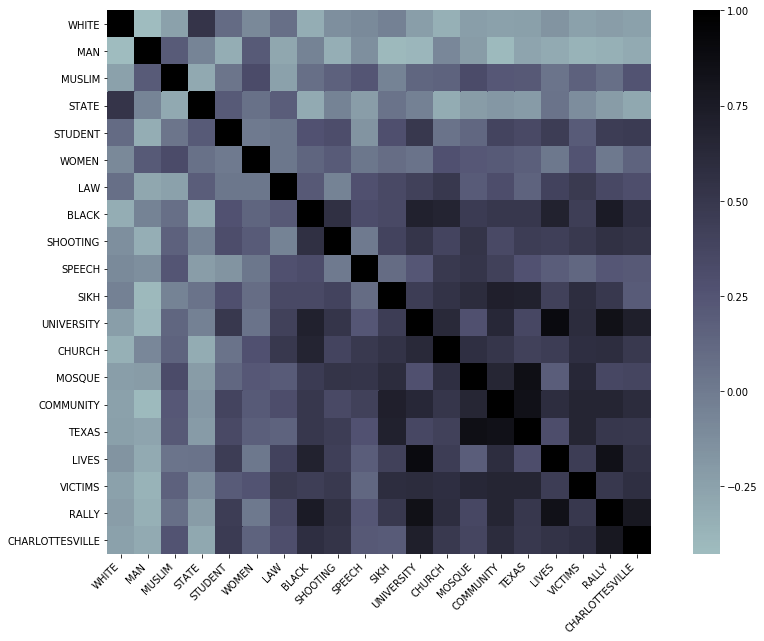

In [125]:
tk = [k[0] for k in Counter(chain(*df.keywords)).most_common(20)]

data = []

for row_k in tk:

    row_vals = []

    for col_k in tk:
        df_a = df[df.keywords.apply(lambda x: row_k in x)]
        df_b = df_a[df_a.keywords.apply(lambda x: col_k in x)]
        if len(df_b) == 0:
            row_vals.append(0)
        else:
            row_vals.append((len(df_a) / len(df_b)) * 100)

    data.append(row_vals)

d = pd.DataFrame(data, index=[*tk], columns=[*tk])

plt.figure(figsize=(15, 10))

corr = d.corr()
ax = sns.heatmap(corr, center=0,cmap='bone_r', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# Events Greater Than a Week in Duration

In [107]:
wg = df[df.length >= 7]
wg = wg[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
wg.sort_values('articles', inplace=True, ascending=False)
wg

,start_end,ascent,descent,length,movement,articles,keywords
2,20150617_20150627,1,9,11,58,15584,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]"
48,20170811_20170821,4,6,11,31,12701,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
71,20181022_20181110,6,13,20,123,8798,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHITE]"
34,20161108_20161126,3,15,19,119,7374,"[WHITE, ELECTION, MUSLIM, STUDENT, WOMEN]"
21,20160611_20160626,2,13,16,109,4814,"[ORLANDO, SHOOTING, GAY, ACT, TERROR]"
22,20160705_20160714,6,3,10,45,4608,"[OFFICERS, DALLAS, BLACK, LAW, WHITE, LIVES]"
20,20160523_20160529,1,5,7,45,4017,"[LAW, LOUISIANA, LIVES, MATTER, BILL]"
43,20170409_20170422,10,3,14,168,3054,"[WHITE, MAN, CAMPAIGN, SIKH, STATE, SHOOTING, ..."
72,20181111_20181118,5,2,8,61,2893,"[FBI, WHITE, REPORTED, STUDENT, MAN]"
39,20170129_20170212,7,7,15,191,2877,"[MUSLIM, SPEECH, STUDENT, JEWISH, BAN, UNIVERS..."


# Events Less Than a Week in Duration

In [108]:
wl = df[df.length > 3]
wl = wl[wl.length < 7]
wl = wl[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
wl.sort_values('articles', inplace=True, ascending=False)
wl

,start_end,ascent,descent,length,movement,articles,keywords
37,20170104_20170108,2,2,5,34,3948,"[CHICAGO, VIDEO, WHITE, VICTIM, MAN]"
41,20170221_20170226,3,2,6,34,2851,"[KANSAS, INDIAN, SHOOTING, JEWISH, COMMUNITY]"
59,20180219_20180224,3,2,6,22,1902,"[WHITE, MAN, SPLC, FAMILY, NRA, LAW, LIFE, GUN]"
35,20161127_20161202,2,3,6,51,1711,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS, EL..."
51,20170912_20170916,3,1,5,20,1686,"[WHITE, RESOLUTION, VIOLENCE, CHARLOTTESVILLE,..."
63,20180402_20180407,2,3,6,76,1630,"[YOUTUBE, AGHDAM, COMPANY, SAN, WOMEN, SHOOTER..."
66,20180617_20180620,1,2,4,2,1557,"[MELANIA, FAMILIES, POLICY, SEPARATED, CHILDRE..."
11,20151207_20151212,4,1,6,35,1481,"[MUSLIM, COMMUNITY, SPEECH, ISLAMIC, GRAFFITI,..."
49,20170826_20170829,1,2,4,33,1411,"[WHITE, RALLY, VIOLENCE, SAN, CHARLOTTESVILLE,..."
28,20160912_20160915,1,2,4,18,1409,"[MUSLIM, SET, WOMEN, MOSQUE, INCIDENT, MAN, NYPD]"


# Events Three Days Long

In [109]:
ws = df[df.length < 4]
ws = ws[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
ws.sort_values('articles', inplace=True, ascending=False)
ws

,start_end,ascent,descent,length,movement,articles,keywords
29,20160922_20160924,1,1,3,10,731,"[WHITE, PROTESTERS, PITTENGER, CHARLOTTE, CONG..."
31,20161010_20161012,1,1,3,30,645,"[SIKH, MAN, RICHMOND, WHITE, KHALSA, MEN, WOME..."
8,20150915_20150917,1,1,3,23,577,"[SIKH, MAN, MUKKER, SINGH, TEEN, ELDERLY, GARCIA]"
60,20180228_20180302,1,1,3,19,552,"[MAN, JEWISH, 2017, PRISON, WHITE, VICTIMS, SE..."
6,20150902_20150904,1,1,3,15,427,"[BLACK, LIVES, MATTER, WHITE, MAN, INSULTS, RA..."
57,20171218_20171220,1,1,3,64,315,"[TWITTER, WHITE, ACCOUNTS, RULES, SUSPENDED, U..."
32,20161014_20161016,1,1,3,48,270,"[SIKH, MEN, KHALSA, MAN, RICHMOND, CHARGES]"
47,20170808_20170810,1,1,3,9,254,"[MOSQUE, MUSLIM, MINNESOTA, BOMBING, WHITE, CA..."
58,20171225_20171227,1,1,3,19,238,"[MEMORIAL, MINNEAPOLIS, REMOVE, LEFT, OFFICER,..."
9,20151002_20151004,1,1,3,12,218,"[OREGON, CHRISTIANS, SHOOTING, OBAMA, MERCER, ..."


# Count of Keywords in Data Frames Based on Length

In [110]:
data = []
for keyword in tk_df.keywords:
    keyword = keyword.split(':')[0]
    c1 = (len(wg[wg.keywords.apply(lambda x: keyword in x)]))
    c2 = (len(wl[wl.keywords.apply(lambda x: keyword in x)]))
    c3 = (len(ws[ws.keywords.apply(lambda x: keyword in x)]))
    data.append([keyword, c1, c2, c3, sum([c1, c2, c3])])

d = pd.DataFrame(data, columns=['Keyword', '2 Weeks', '1 Week', '3 Days', 'Total'])
d

,Keyword,2 Weeks,1 Week,3 Days,Total
0,WHITE,18,15,7,40
1,MAN,10,14,5,29
2,MUSLIM,10,10,1,21
3,STATE,9,9,0,18
4,STUDENT,11,4,0,15
5,WOMEN,5,7,2,14
6,LAW,4,7,1,12
7,BLACK,4,6,1,11
8,SHOOTING,4,4,1,9
9,UNIVERSITY,3,4,1,8


# Events Where Descent was Greater than the Mean

In [111]:
base = df[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
base[base.descent >= round(base.descent.mean())].sort_values('articles', ascending=False)

,start_end,ascent,descent,length,movement,articles,keywords
2,20150617_20150627,1,9,11,58,15584,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]"
48,20170811_20170821,4,6,11,31,12701,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
71,20181022_20181110,6,13,20,123,8798,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHITE]"
34,20161108_20161126,3,15,19,119,7374,"[WHITE, ELECTION, MUSLIM, STUDENT, WOMEN]"
21,20160611_20160626,2,13,16,109,4814,"[ORLANDO, SHOOTING, GAY, ACT, TERROR]"
20,20160523_20160529,1,5,7,45,4017,"[LAW, LOUISIANA, LIVES, MATTER, BILL]"
39,20170129_20170212,7,7,15,191,2877,"[MUSLIM, SPEECH, STUDENT, JEWISH, BAN, UNIVERS..."
38,20170119_20170129,1,9,11,118,2688,"[MAN, MUSLIM, WOMEN, FEDERAL, LAW, STATE, NELS..."
45,20170521_20170603,1,12,14,113,2571,"[PORTLAND, UNIVERSITY, MARYLAND, STABBING, STU..."
70,20180803_20180818,10,5,16,151,2356,"[WHITE, MAN, JONES, SPEECH, FACEBOOK, INFOWARS]"


# Events Where Descent was Less than the Mean

In [112]:
base = df[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
base[base.descent <= round(base.descent.mean())].sort_values('articles', ascending=False)

,start_end,ascent,descent,length,movement,articles,keywords
22,20160705_20160714,6,3,10,45,4608,"[OFFICERS, DALLAS, BLACK, LAW, WHITE, LIVES]"
37,20170104_20170108,2,2,5,34,3948,"[CHICAGO, VIDEO, WHITE, VICTIM, MAN]"
43,20170409_20170422,10,3,14,168,3054,"[WHITE, MAN, CAMPAIGN, SIKH, STATE, SHOOTING, ..."
72,20181111_20181118,5,2,8,61,2893,"[FBI, WHITE, REPORTED, STUDENT, MAN]"
41,20170221_20170226,3,2,6,34,2851,"[KANSAS, INDIAN, SHOOTING, JEWISH, COMMUNITY]"
73,20181125_20181202,5,2,8,167,1954,"[STATE, WHITE, STUDENT, SWASTIKAS, BLACK, COLL..."
59,20180219_20180224,3,2,6,22,1902,"[WHITE, MAN, SPLC, FAMILY, NRA, LAW, LIFE, GUN]"
35,20161127_20161202,2,3,6,51,1711,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS, EL..."
51,20170912_20170916,3,1,5,20,1686,"[WHITE, RESOLUTION, VIOLENCE, CHARLOTTESVILLE,..."
63,20180402_20180407,2,3,6,76,1630,"[YOUTUBE, AGHDAM, COMPANY, SAN, WOMEN, SHOOTER..."


# Windows with Black as a Keyword

In [113]:
black_events = df[df.keywords.apply(lambda x: 'BLACK' in x)]
black_events[['start_end', 'articles', 'keywords']].sort_values('articles', ascending=False)

,start_end,articles,keywords
22,20160705_20160714,4608,"[OFFICERS, DALLAS, BLACK, LAW, WHITE, LIVES]"
73,20181125_20181202,1954,"[STATE, WHITE, STUDENT, SWASTIKAS, BLACK, COLL..."
16,20160221_20160305,1581,"[STUDENT, WHITE, MAN, MUSLIM, BLACK, STATE, WO..."
36,20161221_20161224,1017,"[MISSISSIPPI, CHURCH, MUSLIM, MAN, BLACK, WOMEN]"
3,20150630_20150703,849,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]"
27,20160830_20160902,717,"[WHITE, LIVES, MATTER, MUSLIM, MOVEMENT, SPLC,..."
33,20161030_20161105,501,"[STUDENT, CHURCH, MISSISSIPPI, UNIVERSITY, BLA..."
6,20150902_20150904,427,"[BLACK, LIVES, MATTER, WHITE, MAN, INSULTS, RA..."
18,20160503_20160509,386,"[STUDENT, IOWA, UNIVERSITY, BLACK, WHITE]"
24,20160803_20160806,358,"[MAN, STATE, REPUBLICAN, WHITE, BLACK, LAW, VI..."


# % of Events Where Keyword Appears in Top 3 Keywords for Event

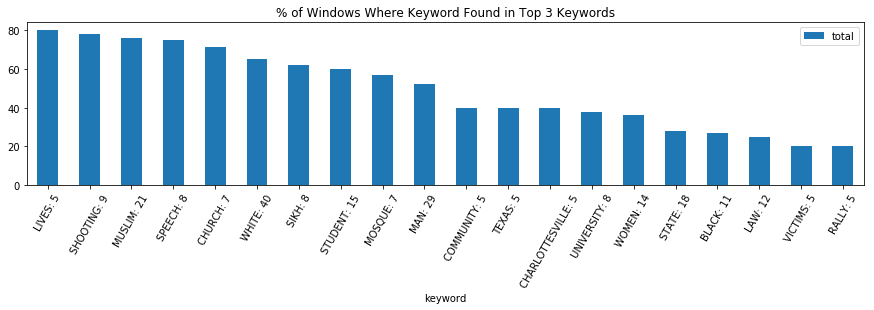

In [114]:
keyword_data = {}
for keyword in tk_df.keywords:
    count = 0
    k = keyword.split(':')[0]
    windows = df[df.keywords.apply(lambda x: k in x)]['keywords']
    for window in windows:
        if k in window[:3]:
            count += 1
    keyword_data.update({keyword: round((count / len(windows)) * 100)})
x = pd.DataFrame([(k, v) for k, v in keyword_data.items()], columns=['keyword', 'total'])
x.sort_values('total', inplace=True, ascending=False)
x.plot(x='keyword', y='total', kind='bar', figsize=(15, 3), rot=60, title='% of Windows Where Keyword Found in Top 3 Keywords')